<a href="https://colab.research.google.com/github/Jun-H-Lee/Fall-2020/blob/main/Macro_pset5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [254]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import scipy.stats as spt

**Exercise 3. (d)**

In [255]:
alpha = 1
beta = 0.95
R = 1/beta
delta = 0.05
b = 0.1
mu_w = -0.125
sig_w = 0.5

In [256]:
def u(c, alpha):
    """
    Utility function
    """
    if c < 0:
      return -np.inf
    if alpha==1:
      return np.log(c)
    else:
      return (c**(1 - alpha) - 1) / (1 - alpha)

Bellman Operator

In [257]:
def T(v, 
      alpha, beta, R, delta, b, 
      w_grid, w_prob, a_grid):
    """
    The Bellman operator.  Updates the guess of the value function.

      * v is an array representing a guess of the value function

    """
    v_new = np.empty_like(v)
    for i_0 in range(np.shape(v)[0]):
      for i_1 in range(np.shape(v)[1]):
        for i_2 in range(np.shape(v)[2]):
          if i_2 == 0:
            v_greedy_1, v_greedy_2 = np.zeros(len(a_grid)), np.zeros(len(a_grid))
            for j_1 in range(len(a_grid)):
              v_greedy_1[j_1] = u(R*a_grid[i_1] + w_grid[i_0] - a_grid[j_1], alpha) + beta * v[i_0, j_1, 1]
              v_greedy_2[j_1] = u(R*a_grid[i_1] + b - a_grid[j_1], alpha) + beta * np.inner(v[:, j_1, 0], w_prob)
            v_new[i_0, i_1, i_2] = np.max([np.max(v_greedy_1), np.max(v_greedy_2)])
          if i_2 == 1:
            v_greedy_1, v_greedy_2 = np.zeros(len(a_grid)), np.zeros(len(a_grid))
            for j_1 in range(len(a_grid)):
              v_greedy_1[j_1] = u(R*a_grid[i_1] + b - a_grid[j_1], alpha) + beta * np.inner(v[:, j_1, 0], w_prob)
              v_greedy_2[j_1] = u(R*a_grid[i_1] + w_grid[i_0] - a_grid[j_1], alpha) + beta * v[i_0, j_1, 1]
            v_new[i_0, i_1, i_2] = delta * np.max(v_greedy_1) + (1-delta) * np.max(v_greedy_2) 
    return v_new

Value Function Iteration

In [258]:
def solve_model(alpha, beta, R, delta, b, mu_w, sig_w,
                w_grid_size, a_grid_size, a_max, w_max,  tol=1e-4,
                max_iter=1000,
                verbose=True,
                print_skip=25):
    """
    Solve model by iterating with the Bellman operator.

    """
    # Discretize Wage (log Normal) Distribution
    w_grid = np.linspace(0.01, w_max, w_grid_size)
    w_prob = spt.lognorm(sig_w).pdf(w_grid)
    w_prob = w_prob / np.sum(w_prob)
    w_grid = w_grid * np.exp(mu_w)


    # Discretize Asset
    a_grid = np.linspace(0.01, a_max, a_grid_size)

    # Set up loop
    v = np.zeros([w_grid_size, a_grid_size, 2])  # Initial condition
    i = 0
    error = tol + 1

    while i < max_iter and error > tol:
        v_new = T(v = v, alpha = alpha, beta = beta, R = R, delta = delta, b = b, w_grid = w_grid, w_prob = w_prob, a_grid = a_grid)
        error = np.max(np.abs(v - v_new))
        i += 1
        if verbose and i % print_skip == 0:
            print(f"Error at iteration {i} is {error}.")
        v = v_new

    if i == max_iter:
        print("Failed to converge!")

    if verbose and i < max_iter:
        print(f"\nConverged in {i} iterations.")

    return  v_new

Implementation

In [259]:
a_max, w_max = 5, 3
a_grid_size, w_grid_size = 101, 61
v = solve_model(alpha = alpha, beta = beta, R = R, delta = delta, b = b, mu_w = mu_w, sig_w = sig_w, w_max = w_max, 
                w_grid_size = w_grid_size, a_grid_size = a_grid_size, a_max = a_max)

Error at iteration 25 is 0.3796836174581202.
Error at iteration 50 is 0.022948824324915407.
Error at iteration 75 is 0.005410510770884613.
Error at iteration 100 is 0.0014280251230847085.
Error at iteration 125 is 0.00039053594940163805.
Error at iteration 150 is 0.00010790118058423559.

Converged in 152 iterations.


**Exercise 3. (e)**

Plot value function of unemployed worker with respect to wage for each asset

Text(0, 0.5, 'value')

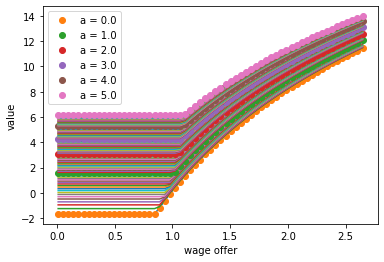

In [260]:
a_grid = np.linspace(0, a_max, a_grid_size)
w_grid = np.linspace(0.01, w_max, w_grid_size) * np.exp(mu_w)
for i_1 in range(a_grid_size):
  plt.plot(w_grid, v[:, i_1, 0])
  if i_1 % 20 == 0:
    plt.plot(w_grid, v[:, i_1, 0], 'o', label = "a = " + np.str(a_grid[i_1]))

plt.legend()
plt.xlabel("wage offer")
plt.ylabel("value")


We can see that the kink point (reservation wage) increases as asset increases.

*Interpretation*
1. As the worker has more asset, he/she has more power to wait for the better wage offer.
2. As the worker has more asset, marginal benefit of wage decreases so that he/she asks for more wage. 

---



**Exercise 3. (f)**

*Case 1:* Larger $\sigma_w$

Error at iteration 25 is 0.3625683954484771.
Error at iteration 50 is 0.030971070711872883.
Error at iteration 75 is 0.007881642660370503.
Error at iteration 100 is 0.002132411836536008.
Error at iteration 125 is 0.0005873698858351872.
Error at iteration 150 is 0.00016261178448750968.

Converged in 160 iterations.


Text(0, 0.5, 'value')

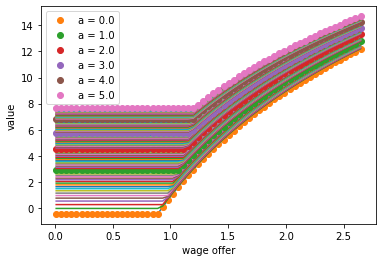

In [261]:
sig_w = 1
v = solve_model(alpha = alpha, beta = beta, R = R, delta = delta, b = b, mu_w = mu_w, sig_w = sig_w, w_max = w_max, 
                w_grid_size = w_grid_size, a_grid_size = a_grid_size, a_max = a_max)
a_grid = np.linspace(0, a_max, a_grid_size)
w_grid = np.linspace(0.01, w_max, w_grid_size) * np.exp(mu_w)
for i_1 in range(a_grid_size):
  plt.plot(w_grid, v[:, i_1, 0])
  if i_1 % 20 == 0:
    plt.plot(w_grid, v[:, i_1, 0], 'o', label = "a = " + np.str(a_grid[i_1]))

plt.legend()
plt.xlabel("wage offer")
plt.ylabel("value")


As we can see, reservation wage increases for each asset level, which is in line with **Exercise 1-1**. 

*Case 2:* Larger $\delta$
 

Error at iteration 25 is 0.10594183039532368.
Error at iteration 50 is 0.008801816922456851.
Error at iteration 75 is 0.002294934598662479.
Error at iteration 100 is 0.0006330530042699678.
Error at iteration 125 is 0.00017551223333178712.

Converged in 136 iterations.


Text(0, 0.5, 'value')

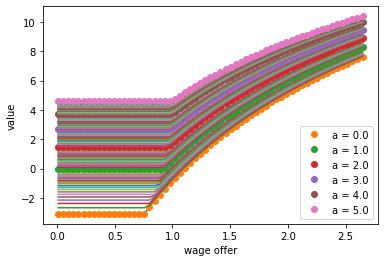

In [262]:
sig_w = 0.5
delta = 0.1
v = solve_model(alpha = alpha, beta = beta, R = R, delta = delta, b = b, mu_w = mu_w, sig_w = sig_w, w_max = w_max, 
                w_grid_size = w_grid_size, a_grid_size = a_grid_size, a_max = a_max)
a_grid = np.linspace(0, a_max, a_grid_size)
w_grid = np.linspace(0.01, w_max, w_grid_size) * np.exp(mu_w)
for i_1 in range(a_grid_size):
  plt.plot(w_grid, v[:, i_1, 0])
  if i_1 % 20 == 0:
    plt.plot(w_grid, v[:, i_1, 0], 'o', label = "a = " + np.str(a_grid[i_1]))

plt.legend()
plt.xlabel("wage offer")
plt.ylabel("value")


As we can see, reservation wage decreases for each asset level, which is in line with **Exercise 1-2**. 